In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns

<AxesSubplot:xlabel='PAY', ylabel='ACCEPTED'>

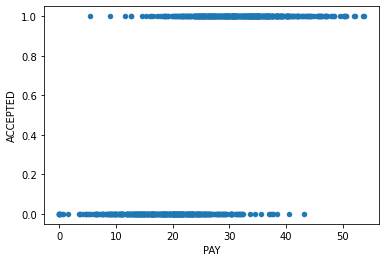

In [2]:
df = pd.read_csv('driverAcceptanceData.csv')
df = df.drop('Unnamed: 0', axis=1)
df.plot(x='PAY',y='ACCEPTED',kind='scatter')

<AxesSubplot:ylabel='Frequency'>

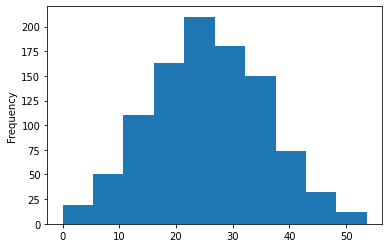

In [3]:
df['PAY'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

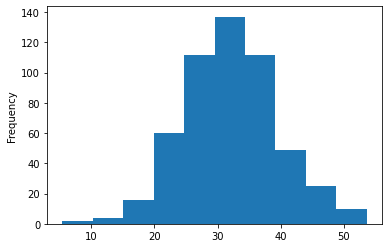

In [4]:
df[df["ACCEPTED"]==1]["PAY"].plot(kind='hist')

This histogram shows that the distribution for the payment for accepted rides follows a normal distribution with a mean close to $32. 

<AxesSubplot:>

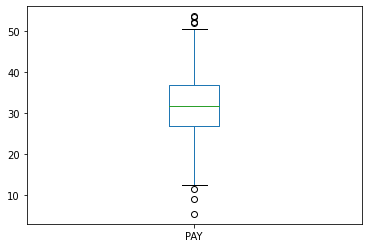

In [5]:
df[df["ACCEPTED"]==1]["PAY"].plot(kind='box')

<AxesSubplot:ylabel='Frequency'>

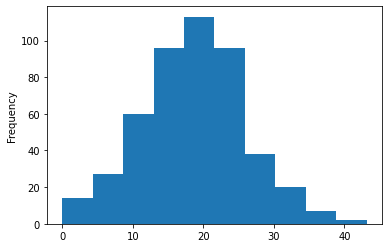

In [6]:
df[df["ACCEPTED"]==0]["PAY"].plot(kind='hist')

This histogram shows that the proposed payment for rides that were denied follows a normal distribution with a mean close to $20. 

In [7]:
df['Profit Margin'] = (30-df['PAY'])*df['ACCEPTED']
df

,PAY,ACCEPTED,Profit Margin
0,29.358732,0,0.000000
1,22.986847,0,0.000000
2,18.020348,0,0.000000
3,45.730717,1,-15.730717
4,14.642845,0,0.000000
...,...,...,...
995,17.382310,0,0.000000
996,20.855120,0,0.000000
997,42.122166,1,-12.122166
998,10.853923,0,0.000000


In [8]:
df['Profit Margin'].sum()

-1094.0771378079999

The business is making a loss of about a thousand in its first month with this current pricing.

<AxesSubplot:xlabel='PAY', ylabel='ACCEPTED'>

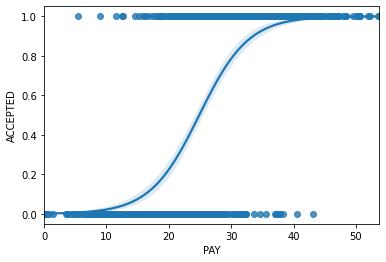

In [9]:
from sklearn.linear_model import LogisticRegression

X = np.array([df["PAY"]]).reshape(-1,1)
y = np.array([df['ACCEPTED']]).ravel()
model = LogisticRegression().fit(X, y)
sns.regplot(x='PAY', y="ACCEPTED", data=df, logistic=True)

It seems that $25 is around the mark where the probability of a ride being accepted based on tha payment is 50/50.

In [10]:
for i in range(20,35):
    print(f'${i}:{model.predict_proba([[i]])}')

$20:[[0.77525228 0.22474772]]
$21:[[0.72798244 0.27201756]]
$22:[[0.67493924 0.32506076]]
$23:[[0.61699452 0.38300548]]
$24:[[0.55552286 0.44447714]]
$25:[[0.49230346 0.50769654]]
$26:[[0.42932925 0.57067075]]
$27:[[0.36856265 0.63143735]]
$28:[[0.31169911 0.68830089]]
$29:[[0.25999636 0.74000364]]
$30:[[0.21420084 0.78579916]]
$31:[[0.17456881 0.82543119]]
$32:[[0.14095427 0.85904573]]
$33:[[0.11292693 0.88707307]]
$34:[[0.0898894 0.9101106]]


The 2nd column in the output list is the probablity that the driver will accept the rider based on the payment. \\$25 is indeed the payment for which the probability of a driver accepting is 50/50. \\$29 is where it is about 74% likely that a driver will accept. At $34, the driver is 91\% likely to accept. The objective is to maximize the difference between the \\$30 flat fee for the rider and the payout to the driver. 

In [32]:
np.random.seed(5)
np.random.poisson(1,1000)

array([0, 1, 2, 2, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 0, 0, 2, 1,
       1, 1, 3, 2, 2, 1, 0, 0, 0, 3, 4, 0, 0, 0, 2, 0, 0, 0, 1, 1, 3, 1,
       0, 1, 1, 0, 1, 2, 1, 0, 1, 2, 0, 1, 0, 0, 2, 1, 0, 1, 4, 3, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 3, 0, 2, 3, 1, 1, 0, 1, 2, 1, 3, 2,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 3, 1, 2, 1, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 2, 1, 0, 3, 0, 4, 1, 0, 1, 1, 2, 2, 1, 1, 1, 0, 1, 0, 1,
       0, 2, 2, 0, 2, 0, 2, 0, 1, 3, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 3, 0, 2, 1, 1, 0, 1, 0, 0, 2, 2, 0, 1, 0, 0, 2, 3, 2, 2,
       2, 0, 1, 0, 2, 3, 2, 0, 1, 0, 1, 1, 2, 1, 1, 1, 0, 0, 0, 0, 0, 3,
       3, 2, 3, 1, 0, 2, 3, 0, 2, 1, 1, 0, 0, 0, 0, 1, 0, 2, 2, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 2, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 2, 1, 0, 0, 1, 0, 0, 0, 1, 1, 2, 0, 1, 0, 2, 2, 2, 2, 1,
       3, 1, 1, 2, 2, 1, 2, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 2, 0, 1, 0, 1,
       2, 1, 4, 2, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 2,